<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Cachorro_coelho_introducao_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução às equações diferencias ordinárias**

 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

# **O problema do cachorro e do coelho**

#**Introdução**
Esse é adptado do [texto](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Cachorro_coelho_artigo.ipynb), complementar o [texto [1]](https://periodicos.ufjf.br/index.php/ridema/article/view/38516).


A ideia aqui é pensarmos em formas de resolvermos o seguinte problema, para introduzir ou relembrar do conceito de equações diferenciais ordinárias:

**Problema:** *Um cachorro e um coelho estão em um ambiente plano, que supomos ser representado por um plano cartesiano, em que o coelho está localizado na origem e é representado pelo ponto $A=(0,0)$. O cachorro está localizado no ponto $B=(80,0)$. Supomos ainda que o coelho costuma usar uma toca que está localizada no ponto $C=(0,50)$.*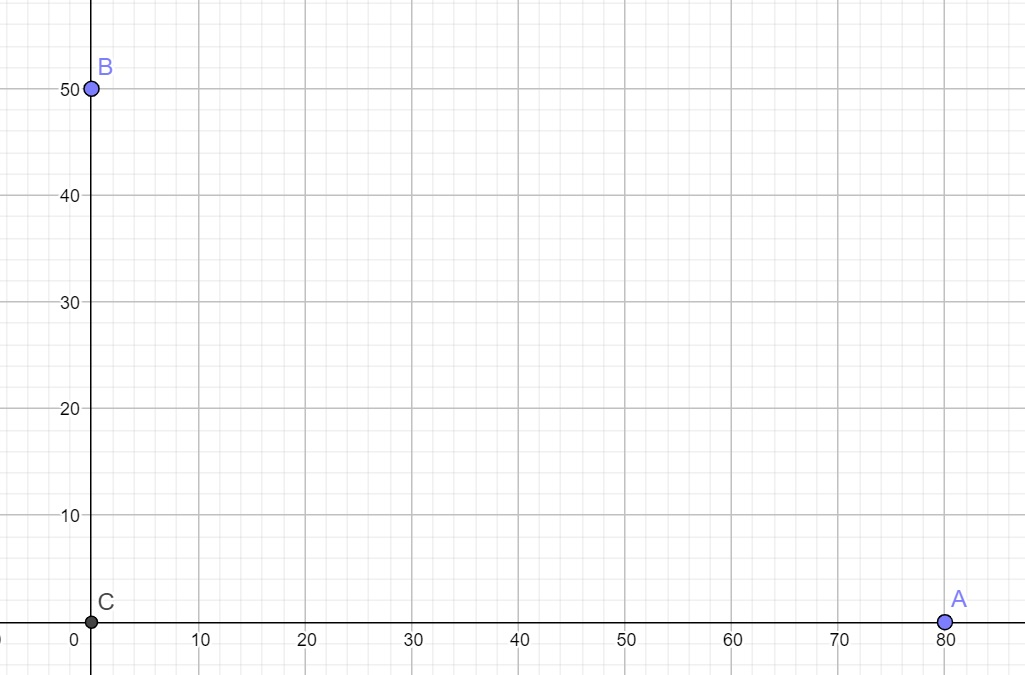

*Em um dado momento o coelho vê o cachorro, e o cachorro vê o coelho; começa a perseguição.*

*Supondo que o coelho corra direto para a toca (em linha reta, sobre o eixo $y$) e que o cachorro corra sempre para a direção em que o coelho está, em cada momento, e que a velocidade do cachorro sempre seja o dobro da velocidade do coelho, perguntamos:*

*a) O cachorro pega o coelho, antes que ele entre na toca?*

*b) Qual é o trajeto (a curva) percorrido pelo cachorro.*

*c) E se não houvesse a toca, o cahorro pegaria o coelho, onde?*


#**Uma abordagem geométrica para o problema.**

Para respondermos às questões apresentadas vamos usar simulação, usando programação em linguagem Python. Vamos supor que o coelho desloca-se em passos de tamanho constante $h=T/n$, em que $T$ é a distância inicial dele até a toca e $n$ é o número de passos necessários para chegar lá.

Supomos que o coelho (é grande e) pula primeiro e depois o cachorro (grande) pula para a direção da nova posição do coelho, a cada passo.

Então, se $n=10$, o coelho se desloca sobre o eixo $y$, nas posições $(0,0),\,(0,5),\,(0,10),\,\ldots ,(0,45),\,(0,50)$.

Vejamos isso em Python, no que segue, podendo variar $n$:

In [1]:
import numpy as np                     # para usar expressões mátemáticas
import matplotlib.pyplot as plt        # para usar expressões fazer gráficos

def Rabbit(n):                         # n é o número de pulos do coelhão e do cachorrão.
  T=50                                 # Distância do coelhão até a toca, no eixo y.
  h=T/n                                # Tamanho do passo do coelhão.
  R=[]                                 # vetor vazio para guardar as posições do coelhão, a cada pulo.
  R.append([0,0])                      # Inclusão da posição inicial do coelhão, que é (0,0).

  for i in range(1,n+1):               # O coelhão dará n pulos, cujas novas posições serão guardadas no vetor R,
    R.append([0,R[i-1][1]+h])          # que já possui a posição inicial, por isso terá n+1 posições no final.
  return np.array(R)                   # np.array(R) transforma a liste R em uma matriz, no caso uma matriz nx2.


Para ver como fica $R$, e cada posição $R_i$, basta usar o comando print, como mostrado a seguir, para ver, por exemplo, que $R_0=(0,0)$ e que $R_2=(0,10)$.

In [2]:
print(Rabbit(n=10))                             # Mostra na tela as posições do coelho.

[[ 0.  0.]
 [ 0.  5.]
 [ 0. 10.]
 [ 0. 15.]
 [ 0. 20.]
 [ 0. 25.]
 [ 0. 30.]
 [ 0. 35.]
 [ 0. 40.]
 [ 0. 45.]
 [ 0. 50.]]


Podemos marcar esses pontos no eixo $y$, como os comando a seguir:

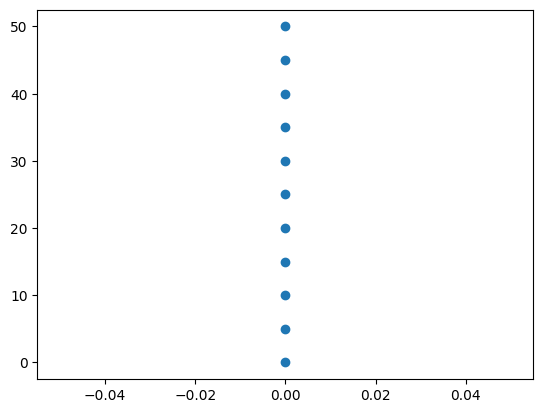

In [14]:
dados=np.transpose(Rabbit(n=10))   # np.transpose(A) transpõe a matriz A.
x=dados[0]
y=dados[1]

plt.plot(x,y,'o')
plt.show()

Faremos agora os deslocamentos do cachorro, que vamos representar por $D$. Supondo aqui que o cachorro faz um movimeto para a posição $D_i=(x_i,y_i)$ a cada movimento para a posição $R_i$ do coelho. Então, quando o cachorro estiver na posição $D_{i-1}$, ele fará um deslocamento de medida $2h$, na direção $V_i=R_i-D_{i-1}$. Isso equivale a dizer que $D_i=D_{i-1}+2hv_i$, em que $v_i$ é o versor de $V_i$, ou seja, $v_i=V_i/|V_i|$.

In [11]:
def Dog(n):                           # Função que retorna as n+1 posições do cachorro.
  R=Rabbit(n)
  h=R[1][1]-R[0][1]
  D=[]                                # Vetor vazio para guardar as posições do cachorrão.
  D.append(np.array([80,0]))          # Inclusão da posição inicial do cachorro.
                                      # O np.array() permite somar e multiplicar vetores por escalar
                                      # (transforma listas em vetores).
  for i in range(1,n+1):              # O coelhão sai primeiro
    V=R[i]-D[i-1]
    mV=np.sqrt(V[0]**2+V[1]**2)
    v=V/mV
    D.append(D[i-1]+2*h*v)
  return np.array(D)

Para ver como fica D, usamos o comando print.

In [12]:
print(Dog(n=10))

[[80.          0.        ]
 [70.01947422  0.62378286]
 [60.10794389  1.95102306]
 [50.33557427  4.07253009]
 [40.80149107  7.08935915]
 [31.64486832 11.10884416]
 [23.05849661 16.23468271]
 [15.30234526 22.54674388]
 [ 8.70980027 30.06594268]
 [ 3.67183802 38.70416798]
 [ 0.58044988 48.21433724]]


Vejamos isso no plano cartesiano $xy$:

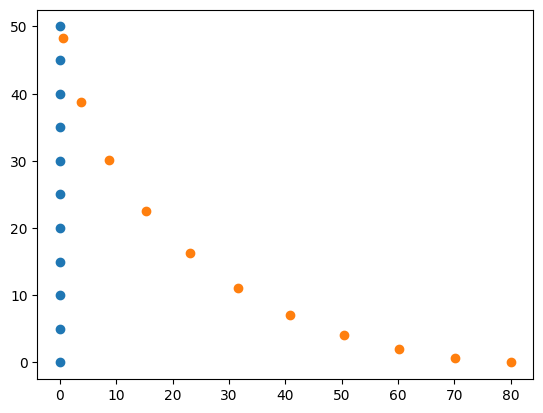

In [17]:
dadosd=np.transpose(Dog(n=10))   # np.transpose(A) transpõe a matriz A.
xd=dadosd[0]
yd=dadosd[1]

plt.plot(x,y,'o')
plt.plot(xd,yd,'o')
plt.show()

Vejamos a direção de movimento do cachorro na figura que segue:

Podemos fazer o gráfico das posições R e D, separando as coordenadas $x$ e $y$ de cada um e usando a função plt.plot().

In [ ]:
def Grafico(u,simb,cor,legenda,titulo):      # Função que retorna gráfico no plano xy.
  xD=[]                                      # u vetor (ou matriz) de duas colunas (ou linhas).
  yD=[]
  for i in range(0,len(u)):
   xD.append(u[i][0])
   yD.append(u[i][1])

  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])

  line_plotted = lines_plotted[0]

  plt.xlim(-1,80+1)

  plt.ylim(-1,60+1)

  plt.plot(xD,yD,simb,label=legenda,color=cor)
  plt.plot(xD,yD,color=cor)
  plt.ylabel('y')
  plt.xlabel('x')
  plt.title(titulo)
  plt.legend()
  plt.show()

Vejamos o gráfico do trajeto do cachorrão, com $n=10$ passos e $n=20$ passos.

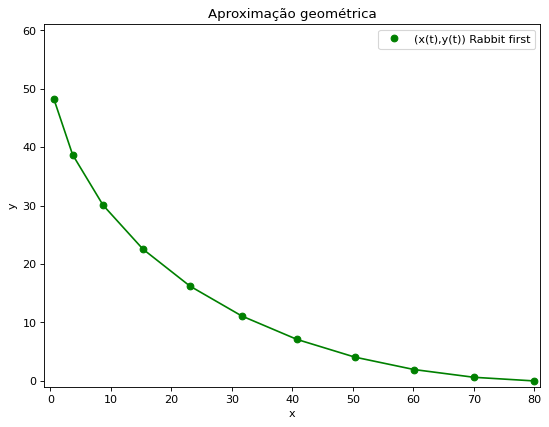

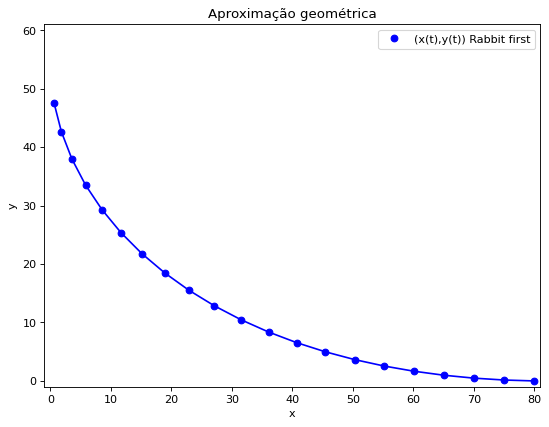

In [ ]:
Grafico(Dog(10),simb='o',cor='green',legenda="(x(t),y(t)) Rabbit first",titulo='Aproximação geométrica')
Grafico(Dog(20),simb='o',cor='blue',legenda="(x(t),y(t)) Rabbit first",titulo='Aproximação geométrica')

Cabe destacar aqui que, caso o cachorro desse um passo primeiro e se deslocasse $2h$ na direção em que o coelho estava e que depois o coelho desse um passo de tamanho $h$, então a trajetória nesse contexto estaria abaixo da que acabamos de simular.

Simulamos essa situação no que segue.


In [ ]:
def Dog2(n):
  R=Rabbit(n)
  h=R[1][1]-R[0][1]
  D2=[]                               # Vetor vazio para guardar as posições do cachorrão.
  D2.append(np.array([80,0]))         # Inclusão da posição inicial do cachorro.

  for i in range(1,n+1):
    r=np.array(R[i-1])                # Cachorrão sai primeiro.
    d=np.array(D2[i-1])
    V=r-d
    mV=np.sqrt(V[0]**2+V[1]**2)
    v=V/mV
    D2.append(D2[i-1]+2*h*v)
  return np.array(D2)

Vejamos como ficam os gráficos, quando o cachorro sai primeiro, para $n=10$ e $n=20$.

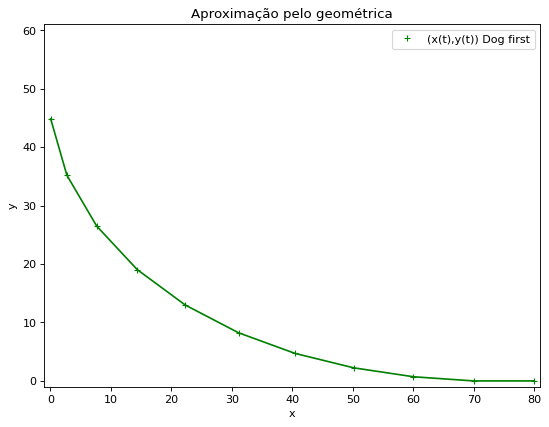

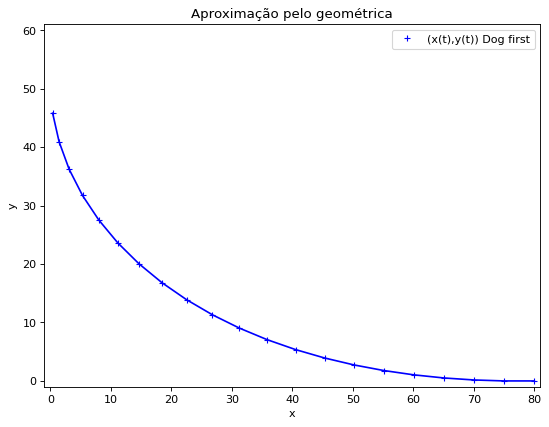

In [ ]:
Grafico(Dog2(10),simb='+',cor='green',legenda="(x(t),y(t)) Dog first",titulo='Aproximação pelo geométrica')
Grafico(Dog2(20),simb='+',cor='blue',legenda="(x(t),y(t)) Dog first",titulo='Aproximação pelo geométrica')

Isso sugere que a trajetória do cachorro, quando ele e o coelho dão passos simultâneos e de tamanho muito pequeno, ficará entre as duas trajetórias, a que o coelho sai antes e a que o cahorro sai antes.

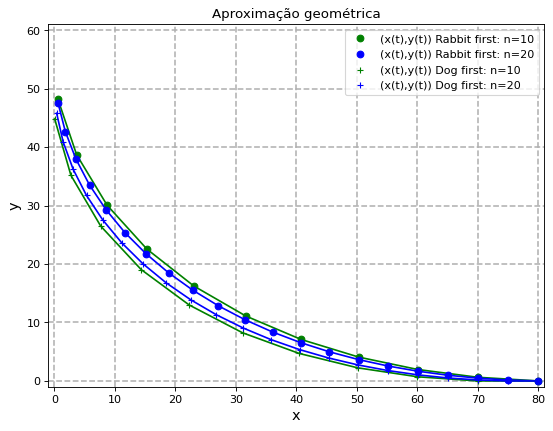

In [ ]:
u=Dog(n=10)
x10=[]
y10=[]
for i in range(0,len(u)):
  x10.append(u[i][0])
  y10.append(u[i][1])

u=Dog(n=20)
x20=[]
y20=[]
for i in range(0,len(u)):
  x20.append(u[i][0])
  y20.append(u[i][1])

u=Dog2(n=10)
x210=[]
y210=[]
for i in range(0,len(u)):
  x210.append(u[i][0])
  y210.append(u[i][1])

u=Dog2(n=20)
x220=[]
y220=[]
for i in range(0,len(u)):
  x220.append(u[i][0])
  y220.append(u[i][1])

Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)

plt.plot(x10,y10,'o',color='green',label="(x(t),y(t)) Rabbit first: n=10")
plt.plot(x10,y10,color='green')

plt.plot(x20,y20,'o',color='blue',label="(x(t),y(t)) Rabbit first: n=20")
plt.plot(x20,y20,color='blue')

plt.plot(x210,y210,'+',color='green',label="(x(t),y(t)) Dog first: n=10")
plt.plot(x210,y210,color='green')

plt.plot(x220,y220,'+',color='blue',label="(x(t),y(t)) Dog first: n=20")
plt.plot(x220,y220,color='blue')

plt.ylabel('y',fontsize=13)
plt.xlabel('x',fontsize=13)
plt.title('Aproximação geométrica')

plt.grid(linewidth = "1.4", linestyle = "--")
plt.legend()
plt.show()

In [ ]:
Figure.savefig('Graficodoisb.jpg', bbox_inches='tight', dpi=150) # para gravação de figura.

Observando essa simulação, concluímos então que o cachorro não pegará o coelho, porque a trajetória terá comprimento maior que 100 unidades. O comprimento dessa trajetória aumenta caso o número de passos do coelho aumente, e o tamanho do passo diminua. O que responde o item a).

Você pode aumentar o valor de $n$ nas simulações feitas e ver o que acontece. Isso vai te ajudar a responder os itens b) e c).

No que segue apresentamos outra forma de analisar a trajetória do cachorro.

#**Equação diferencial ordinária e o método de Euler**

Iniciamos agora uma versão de resolução do problema usando uma equação diferencial ordinária e o método de Euler.

Da resolução geométrica do problema do cachorro perseguindo o coelho que fizemos acima, nós podemos ver que a trajetória que o cachorro segue na perseguição do coelho é da forma $d(t)=(x(t),y(t))$, em função do tempo $t$, e que pode ser também vista como  $d(x)=(x,y(x))$, em função da coordenada $x$ da posição do cachorro. Aqui a posição incicial do cachorro será $d(0)=(L,0)$.

É importante mencionar que deveríamos usar notação diferente para $d(t)$ e $d(x)$, por exemplo, denotar $D(t)=d(x(t))=d(x)$, em que $x(t)$ denota que $x$ depende de $t$. Mas vamos usar a mesma notação, por simplicidade, ou por escolha mesmo.

Sendo assim, se o cachorro, na posição $(x_c,y_c)=(x(t),y(t))$, está sempre deslocando-se na direção da posição $(0,r(t))$ do coelho, então a reta  $$s:\, y-y_c=m(x-x_c),$$ tangente à trajetória do cachorro, intercepta o eixo $y$ na coordenada $r(t)$, ou seja, na posição em que o coelho está, naquele momento $t$, em que $$m=\left.\frac{dy}{dx}\right|_{x=x_c},$$ denota a taxa de variação, ou a velocidade, em que $y$ varia em função de $x$, quando $x=x_c$.

Nessa última passagem, outra vez, precisamos mencionar que, para cada $t$ poderemos ter uma reta diferente, mas não vamos nos distrair com isso incluindo mais notação.

Como a posição do coelho sempre tem coordenada $x=0$, temos então que $(0,r(t))=(0,y)$ é a posição do coelho, no momento $t$, e que está sobre a reta $s$. Isso nos diz que $$r(t)-y_c=m(0-x_c),$$
ou que$$r(t)-y(t)=-mx(t),$$ ou que $$r(t)=y(t)-mx(t).$$

Como mencionamos que a posição do cachorro pode ser vista como função de $x=x(t)$, podemos abusar mais um pouco da notação e escrever também $$r(x)=y(x)-x\frac{dy}{dx},$$ ou
$$\tag{1}\frac{dy}{dx}=\frac{y(x)-r(x)}{x},\qquad x> 0,$$ em que $(x,y(x))$ denota a posição do cachorro e $(0,r(x))$ é a posição do coelho, no momento $t$.

Dadas essas considerações, podemos agora analisar a condição sobre a velocidade do cachorro, em relação à velocidade do coelho. Se a velocidade do cachorro fosse igual a do coelho e $L>0$, o cachorro jamais alcançaria o coelho, porque seu trajeto não seria em linha reta. Você concorda com isso? Por que?





A velocidade do coelho, em função de $t$, pode ser representada pelo número $\displaystyle \frac{dr}{dt}$ e a do cachorro pode ser representada pelo vetor $\displaystyle\left( \frac{dx}{dt},\frac{dy}{dt}\right)$.  

Vamos supor então que a velocidade do cachorro seja o dobro da velocidade do coelho, até o final desse texto. Isso quer dizer que
$$\left| \frac{dr}{dt}\right|=\frac{1}{2}\left|\left( \frac{dx}{dt},\frac{dy}{dt}\right)\right|=\frac{1}{2}\sqrt{\left( \frac{dx}{dt}\right)^2+\left(\frac{dy}{dt}\right)^2}.$$

Observe que, como $x$ depende de $t$, a [regra da cadeia](https://pt.wikipedia.org/wiki/Regra_da_cadeia#:~:text=Em%20c%C3%A1lculo%2C%20a%20regra%20da%20cadeia%20%C3%A9%20uma,grande%20import%C3%A2ncia%20para%20o%20avan%C3%A7o%20do%20c%C3%A1lculo%20diferencial.) nos dá as igualdades $$\frac{dy}{dt}=\frac{dy}{dx}\frac{dx}{dt},\qquad \frac{dr}{dt}=\frac{dr}{dx}\frac{dx}{dt}.$$
Isso e as restrições de velocidade do cachorro e do coelho produzem a igualdade
$$	\left| \frac{dr}{dx}\right|=\frac{1}{2}\sqrt{1+\left(\frac{dy}{dx}\right)^2}.$$
	Note que o cachorro para quando o coelho para, mas isso não faz sentido durante a perseguição; e podemos supor que $dx/dt$ é não nulo no argumento acima.

No contexto do problema, podemos retirar o módulo da última expressão e escrever
$$\tag{2}
	 \frac{dr}{dx}=-\frac{1}{2}\sqrt{1+\left(\frac{dy}{dx}\right)^2},
$$ porque $r(x)$ cresce quando $x$ decresce, porque o coelho corre para a toca e não faz sentido ele voltar para trás nesse processo.

Supondo, por exemplo que a posição inicial do cachorro seja $(80,0)$ e que a posição inicial do coelho seja $(0,0)$, ou seja, que $r(80)=0$ e que $y(80)=0$. Tendo em mente as equações $(1)$ e $(2)$, obtemos  o sistema de  equações diferenciais ordinárias (ou [problema de valor inicial](https://pt.wikipedia.org/wiki/Problema_de_valor_inicial#:~:text=Um%20problema%20de%20valor%20inicial%20%28P.V.I.%29%20%C3%A9%20uma,que%20%C3%A9%20solu%C3%A7%C3%A3o%20da%20equa%C3%A7%C3%A3o%20diferencial%20e%20satisfaz)):
$$
	\left\{\begin{array}{llll}\displaystyle \frac{dy}{dx}&=&\displaystyle\frac{y(x)-r(x)}{x}\\\\\displaystyle\frac{dr}{dx}&=&-\displaystyle\frac{1}{2}\sqrt{1+\left(\frac{y(x)-r(x)}{x}\right)^2}\\\\y(80)&=&0\\\\r(80)&=&0\end{array}\qquad
\right.$$

Essa equação pode ser resolvida numericamente, por meio do [método de Euler](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Euler), e vai produzir uma curva poligonal semelhante a que obtivemos com o argumento geométrico. Para isso, vamos usar e seguinte notação vetorial:
$$\tag{3}
Y(x)=\left[\begin{array}{llll}y(x)\\ r(x)\end{array}\right],\qquad
F(x,Y)=	\left[\begin{array}{llll}\displaystyle \frac{dy}{dx}\\\\\displaystyle\frac{dr}{dx}\end{array}\right]=\left[\begin{array}{llll}\displaystyle\frac{y(x)-r(x)}{x}\\\\-\displaystyle\frac{1}{2}\sqrt{1+\left(\frac{y(x)-r(x)}{x}\right)^2}\end{array}\right].$$



In [ ]:
def F(s,U):                         # Equação U'=(u',v')=F(x,U), s=x, u=r (rabbit) e v=y (dog).
  y=U[0]
  r=U[1]
  dydx=(y-r)/s
  drdx=-np.sqrt(1+(dydx)**2)/2
  return np.array([dydx, drdx])

Tomando um ''passo'', em $x$, de 5 metros, por exemplo. O método de Euler, nesse caso, consiste em tomarmos
$$Y_0=Y(80)=\left[\begin{array}{llll}0\\0\end{array}\right]$$ para aproximar $Y(75)$, $Y(70)$, $\ldots$, $Y(5)$, $Y(0)$.

Essas aproximações são feitas usando uma aproximação para $Y(x)$, dada pela equação $(3)$, em cada ponto, por uma reta, da forma
$$\tag{4}Y(80-(j+1)h)\approx Y_{j+1}= Y_j-hF(80-jh,Y_j).$$ Isso quer dizer que, para $j=0$ e $h=5$, temos
$$Y(75)\approx Y_{1}= Y_0-5F(80,Y_0)=\left[\begin{array}{llll}0\\\\0\end{array}\right]-5\left[\begin{array}{llll}0\\\\-\displaystyle\frac{1}{2}\end{array}\right]=\left[\begin{array}{llll}0\\\\2.5\end{array}\right],$$
$$Y(70)\approx Y_{2}= Y_1-5F(75,Y_1)=\left[\begin{array}{llll}0\\\\2.5\end{array}\right]-5\left[\begin{array}{llll}\displaystyle\frac{0-2.5}{75}\\\\-\displaystyle\frac{1}{2}\sqrt{1+\left(\frac{0-2.5}{75}\right)^2}\end{array}\right].$$
Repetindo o Procedimento $(4)$, você deve encontrar
$$Y(0)\approx Y_{16}= Y_{15}-5F(5,Y_{15})=\left[\begin{array}{llll}42.496958753618074\\\\48.572923288657165\end{array}\right].$$

Por outro lado, se tomar $h=1$, por exemplo, e repetir o Procedimento $(4)$, você deve encontrar
$$Y(0)\approx Y_{80}=\left[\begin{array}{llll}48.44618462910899\\ 51.02072615022646\end{array}\right],$$ que é uma aproximação melhor para $Y(0)$. O que responde ao item a), ou seja, o cachorro não pega o coelho, porque ele entra na toca antes.

Como pode ver, isso é bastante trabalhoso para fazermos manualmente, mesmo que usando uma calculadora.

Veja código em Python a seguir. Nesse código obtemos como retorno as posições $(0,r(x))$ como posição do coelho e $(x,y(x))$ como posição do cachorro:

In [ ]:
def Euler(m):                          # m é o número de passos para o método de Euler para resolver a equação u'(x)=F(x,u(x)), u(x)=(r(x),y(x)).
  L=80                                 # Dados de inicialização.
  h=(0-L)/m                            # passo para o método de Euler para resolver a equação u'=F(x,u).
  r=[]                                 # Vetor para guardar coordenadas discretas da posição do coelho (rabbit).
  d=[]                                 # Vetor para guardar coordenadas discretas da posição do cachorro (dog).
  d.append(np.array([L,0]))
  r.append(np.array([0,0]))
  U=[]                                 # Vetor para guardar a posição (x,y) do cachorro.
  U.append(np.array([0,0]))

  for i in range(1,m+1):               # Método de Euler u_(n+1)=u_n+hF(s_n,u_n)
      U.append(U[i-1]+h*F(d[i-1][0],U[i-1]))
      d.append([d[i-1][0]+h,U[i][0]])
      r.append([0,U[i][1]])
  return np.array([d,r])


Vejamos o trajeto aproximado, com $n=16$ passos em função de $x$.

O comando E[0] nos mostra as posições do cachorro

In [ ]:
E=Euler(16)
E[0]

array([[80.        ,  0.        ],
       [75.        ,  0.        ],
       [70.        ,  0.16666667],
       [65.        ,  0.51200394],
       [60.        ,  1.05010705],
       [55.        ,  1.79774649],
       [50.        ,  2.77518536],
       [45.        ,  4.00735638],
       [40.        ,  5.52561557],
       [35.        ,  7.37046408],
       [30.        ,  9.59599047],
       [25.        , 12.27759439],
       [20.        , 15.52656944],
       [15.        , 19.52090345],
       [10.        , 24.58183517],
       [ 5.        , 31.42133777],
       [ 0.        , 42.49695875]])

e E[1] nos mostra as posições do coelho.

In [ ]:
E[1]

array([[ 0.        ,  0.        ],
       [ 0.        ,  2.5       ],
       [ 0.        ,  5.0013885 ],
       [ 0.        ,  7.5073443 ],
       [ 0.        , 10.02178037],
       [ 0.        , 12.54957411],
       [ 0.        , 15.09689558],
       [ 0.        , 17.67168904],
       [ 0.        , 20.28440367],
       [ 0.        , 22.94914878],
       [ 0.        , 25.685614  ],
       [ 0.        , 28.52246964],
       [ 0.        , 31.50390549],
       [ 0.        , 34.70369862],
       [ 0.        , 38.26084037],
       [ 0.        , 42.49695875],
       [ 0.        , 48.57292329]])

Vejamos agora como as trajeórias aproximadas ficam com o uso do método de Euler:

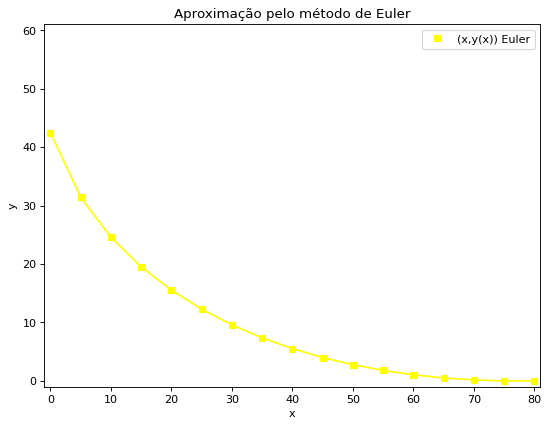

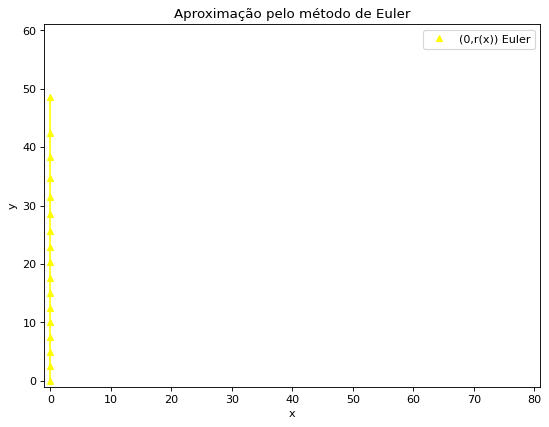

In [ ]:
Grafico(E[0],simb='bs',cor='yellow',legenda="(x,y(x)) Euler",titulo='Aproximação pelo método de Euler')
Grafico(E[1],simb='g^',cor='yellow',legenda="(0,r(x)) Euler",titulo='Aproximação pelo método de Euler')

Podemos juntar os gráficos como segue.

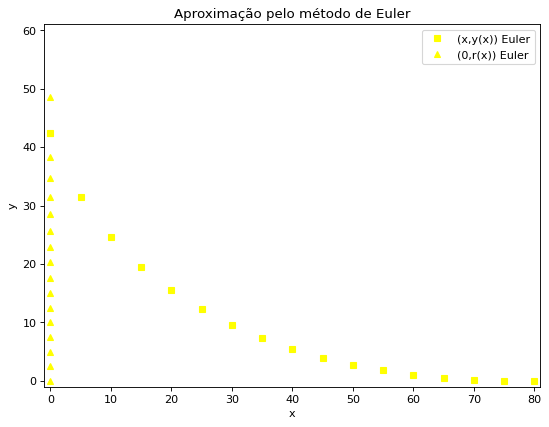

In [ ]:
E=Euler(16)

Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)

plt.plot([x[0] for x in E[0]], [x[1] for x in E[0]],'bs',label='(x,y(x)) Euler',color='yellow')
plt.plot([x[0] for x in E[1]], [x[1] for x in E[1]],'g^',label='(0,r(x)) Euler',color='yellow')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Aproximação pelo método de Euler')
plt.show()

plt.close()



Repetindo as simulações podemos responder os itens c) e d).

#**Determinando a solução analítica $y=f(x)$ da Equação $(3)$**

Você tem alguma ideia para determinar expressões para as funções $r(x)$ e $y(x)$, a partir da Equação $(3)$?

Vamos seguir mais um caminho para resolução do problema proposto, resolvendo a equação diferencial que encontramos.

Note que podemos derivar a Expressão $(1)$ em relação a $x$ e obter a igualdade
$$\frac{dr}{dx}=-x\frac{d^2y}{dx^2},$$ que, em conjunto com a Expressão $(2)$, produz a equação diferencial de segunda ordem
$$\tag{5}\left\{
	\begin{array}{ccccc}\displaystyle x\frac{d^2y}{dx^2}&=&\displaystyle\frac{1}{2}\sqrt{1+\left(\frac{dy}{dx}\right)^2}\\\\y(80)&=&0\\\\\displaystyle\left.\frac{dy}{dx}\right|_{x=80}&=&\displaystyle\frac{0-0}{80}&=&0\end{array}\right.,$$
que depende só de $x$ e de $y(x)$.

Se fizermos a mudança de variável $u(x)=\displaystyle\frac{dy}{dx}$, obtemos a equação
$$\tag{6}\left\{
	\begin{array}{ccccc}\displaystyle \frac{du}{dx}&=&\displaystyle\frac{1}{2x}\sqrt{1+u^2}\\\\u(80)&=&0\end{array}\right.$$

e podemos checar que
$$\tag{7}y(x)=\frac{(x-240) \sqrt{x}+160\sqrt{80}}{12 \sqrt{5}}$$ é a função que estamos procurando, por meio das equações $(5)$ e $(6)$.



In [ ]:
def f(s):               # Soulção exata y=f(x)
  pf=( (s-240)*np.sqrt(s)+160*np.sqrt(80))/(12*np.sqrt(5))
  return pf

Podemos agora observar o gráfico de $f(x)$, para $x$ entre $0$ e $80$.

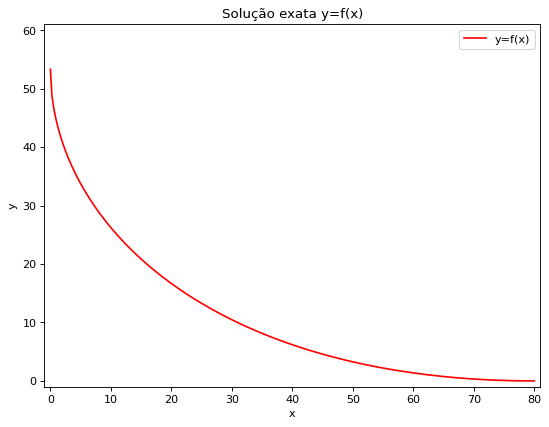

In [ ]:

xt=np.linspace(0,80,320+1)   # x varia de 0.25 em 0.25.
fp=f(xt)                     # pontos y=f(x).

Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)

plt.plot(xt,fp,color='red',label='y=f(x)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Solução exata y=f(x)')
plt.show()


Para encontrar a expressão analítica para $y(x)$, como mostramos agora, você pode seguir alguns caminhos. Um é derivar $y(x)$ e ver o que acontece. Vamos deixar esse caminho para você, leitor.

Como $y(x)$ foi dado como num passe de mágica, terminamos esses comentários com uma breve explicação do caminho que seguimos para encontrá-lo.

Começamos reescrevendo a Equação $(6)$  como
$$\left\{
	\begin{array}{ccccc}\displaystyle \frac{1}{\sqrt{1+u^2}}\frac{du}{dx}&=&\displaystyle\frac{1}{2x}\\\\u(80)&=&0\end{array}\right..$$
Integrando de ambos os lados, em relação a $x$, obtemos a igualdade
$$\left\{
\begin{array}{ccccc}\displaystyle senh^{-1}(u)&=&\displaystyle\frac{1}{2}\ln(x)+c_1.\\\\u(80)&=&0\end{array}\right..$$ Observando que  $${\displaystyle \operatorname {senh} (s)={\frac {e^{s}-e^{-s}}{2}}} $$ é a [função seno hiperbólico](https://pt.wikipedia.org/wiki/Seno_hiperb%C3%B3lico); e que $ \operatorname {senh}^{-1}(u)$ é a função inversa dela.

Segue que $c_1=-\ln(80)$ e que
$$u(x)=senh\left(\frac{\ln(x)-\ln(80)}{2}\right)=senh\left(\frac{1}{2}\ln\left(\frac{x}{80}\right)\right)=senh\left(\ln\left(\sqrt{\frac{x}{80}}\right)\right),$$
ou que
$$u(x)=\frac{ \sqrt{\frac{x}{80}}-\sqrt{\frac{80}{x} }}{2}.$$

Por fim, chegamos a  
$$y(x)=\int u(x)\,dx+c_2.$$ Deixamos o leitor calcular a integral e encontrar $c_2$.

Depois de encontrar $y(x)$, você pode comparar com a Expressão $(7)$ e voltar na Equação $(1)$ para determinar também $r(x)$.

Para comparar o gráfico de $y(x)$ com os pontos obtidos na simulação geométrica do cachorro e do coelho ou da simulação com o método de Euler, mostrada nos gráficos que já apresentamos, incluímos um gráfico com as duas formas de aproximar e a solução exata.

Isso reforça que a aproximação geométrica e a aproximação pelo método de Euler são aproximações diferentes, mas aproximam a mesma curva.

O cachorro alcançaria o coelho em $$y(0)=\frac{160\sqrt{80}}{12 \sqrt{5}}=\frac{160}{3}=53.3333\cdots,$$ se ele não entrasse na toca antes!

Encerramos este texto como um gráfico com todas as aproximações que fizemos, usando $n=10$, para a aproximação geométrica, e $n=16$ para a aproximação pelo método de Euler.

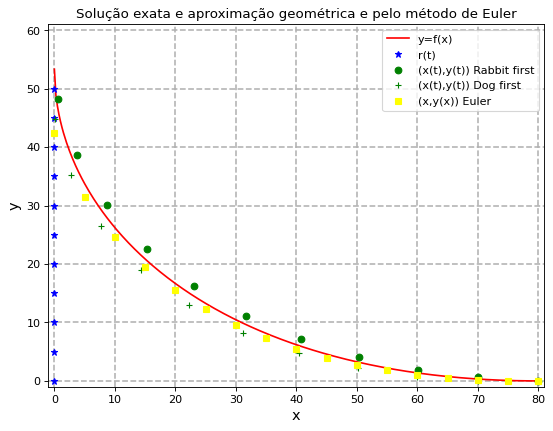

In [ ]:
R=Rabbit(10)
D=Dog(10)
D2=Dog2(10)
E=Euler(16)[0]

Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)

plt.plot(xt,fp,color='red',label='y=f(x)')
plt.plot([x[0] for x in R], [x[1] for x in R],'*',label='r(t)',color='blue')
plt.plot([x[0] for x in D], [x[1] for x in D],'o',label='(x(t),y(t)) Rabbit first',color='green')
plt.plot([x[0] for x in D2], [x[1] for x in D2],'+',label='(x(t),y(t)) Dog first',color='green')
plt.plot([x[0] for x in E], [x[1] for x in E],'bs',label='(x,y(x)) Euler',color='yellow')
plt.ylabel('y',fontsize=13)
plt.xlabel('x',fontsize=13)
plt.legend()
plt.title('Solução exata e aproximação geométrica e pelo método de Euler')

plt.grid(linewidth = "1.4", linestyle = "--")
plt.show()

plt.close()



In [ ]:
Figure.savefig('Grafico.jpg', bbox_inches='tight', dpi=150) # para gravação de figura.

Observe que, quando o cachorro sai primeiro, no procedimento geométrico, obtemos valores mais próximos dos do método de Euler. Note também que esse procedimento seria a versão do método de Euler para o problema, se considerarmos que o velocidade do coelho em função do tempo é constante.

Além disso, o método de Euler para resolver numéricamente a equação usa $x$ como variável independente. Já no caso geométrico a variável independente é $t$.


#**Referências**



1. FERREIRA, J. C.; JULIO, R. S. [O problema do cachorro e do coelho: uma perseguição a partir de produções de significados.](https://periodicos.ufjf.br/index.php/ridema/article/view/38516) Revista de Investigação e Divulgação em Educação Matemática , [S. l.], v. 6, n. 1, 2022.

2. STEWART, J. Cálculo: volume 2. São Paulo: Cengage Learning, 2013.

3. FERREIRA, J. C. [Quando os Métodos de Euler e de Newton coincidem.](https://rmu.sbm.org.br/wp-content/uploads/sites/27/2021/03/3-Quandos-os-m%C3%A9todos-de-Eules-e-Newton-coinciden.pdf) Revista Matemática Universitária, v.1, 2021.

# **Versão com animação de movimento**

**Versão geométrica.**

In [ ]:
R=Rabbit(64)
D=Dog(64)

# para fazer animação
from matplotlib.animation import FuncAnimation
from IPython import display
Figure = plt.figure(figsize=(8,6), dpi=80)
# creating a plot
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)

def hit(j):
    plt.plot([x[0] for x in R[:j]], [x[1] for x in R[:j]])
    plt.plot(R[j][0],R[j][1],'*')
    plt.plot([x[0] for x in D[:j]], [x[1] for x in D[:j]])
    plt.plot(D[j][0],D[j][1],'o')


anim_created = FuncAnimation(Figure, hit, frames=64+1, interval=100)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

**Versão com equação diferencial**

In [ ]:
E=Euler(64)
R=E[1]
D=E[0]

# para fazer animação
Figure = plt.figure(figsize=(8,6), dpi=80)
# creating a plot
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)

def hit(j):
    plt.plot([x[0] for x in R[:j]], [x[1] for x in R[:j]])
    plt.plot(R[j][0],R[j][1],'*')
    plt.plot([x[0] for x in D[:j]], [x[1] for x in D[:j]])
    plt.plot(D[j][0],D[j][1],'o')



anim_created = FuncAnimation(Figure, hit, frames=64+1, interval=100)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()